In [1]:
import numpy as np
import pdb
import dill
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import json
from glob import glob


In [2]:
result_dir = "/home/yuxiaoc/repos/ngc_workspace/eval_result"
figure_dir = "/home/yuxiaoc/repos/behavior-generation/figures"
results = list()
sigmas = []
alias = {"GroundTruth":"GT","HierAgentAware":"HAA","Hierarchical":"Hier","BC":"BC","TPP":"TPP","TrafficSim":"TS"}
metric_keys = []
for file in os.listdir(result_dir):
    curr_dir = os.path.join(result_dir,file)
    if os.path.isdir(curr_dir):
        if "stats.json" in os.listdir(curr_dir):
            config=json.load(open(os.path.join(result_dir,file,"config.json"), "r"))
            stats=json.load(open(os.path.join(result_dir,file,"stats.json"), "r"))
            eval_class = config["eval_class"]
            for k,v in stats.items():
                if k=="ego_cvae_metrics_gt_loglikelihood":
                    print(curr_dir)
                if k not in ["scene_index"]:
                    key = k.split("_")
                    if "OU" in key:
                        idx = key.index("OU")
                        if idx<len(key)-2 and key[idx+1]=="sigma":
                            sigma = float(key[idx+2])
                            key = key[:idx]+key[idx+3:]
                            k = "_".join(key)
                        else:
                            sigma=0
                    else:
                        sigma=0
                    if k not in metric_keys:
                        metric_keys.append(k)
                    if sigma not in sigmas:
                        sigmas.append(sigma)
                    results.append({"class":alias[eval_class],"sigma":sigma,"key":k,"value":np.mean(v)})
                    # print(k,":,",np.mean(v))

In [3]:
def get_comparison(results,key,condition,index_var):
    xlabel = list()
    yvalue = list()
    for entry in results:
        flag = True
        flag = flag & (entry["key"]==key)
        for cond_k,cond_v in condition.items():
            flag = flag & (entry[cond_k]==cond_v)
        if flag:
            xlabel.append(entry[index_var])
            yvalue.append(entry["value"])
    return xlabel,yvalue

In [4]:
metric_keys

['ego_ADE',
 'ego_FDE',
 'all_off_road_rate_rate',
 'all_off_road_rate_nframe',
 'all_collision_rate_CollisionType.FRONT',
 'all_collision_rate_CollisionType.REAR',
 'all_collision_rate_CollisionType.SIDE',
 'all_collision_rate_coll_any',
 'ego_occu_likelihood_indep_likelihood',
 'ego_occu_likelihood_joint_likelihood',
 'all_occupancy_coverage_total',
 'all_occupancy_coverage_onroad',
 'all_occupancy_coverage_success',
 'ego_occupancy_diversity',
 'ego_cvae_metrics_loglikelihood']

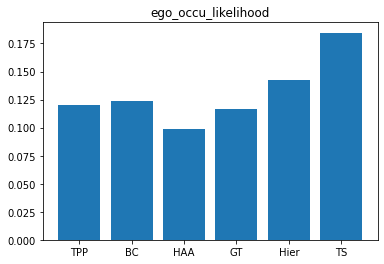

In [5]:
xlabel,yvalue = get_comparison(results,"ego_occu_likelihood_joint_likelihood",{"sigma":0},"class")
plt.bar(xlabel,yvalue)
plt.title("ego_occu_likelihood")
plt.savefig(os.path.join(figure_dir,"ego_occu_likelihood_class.png"))

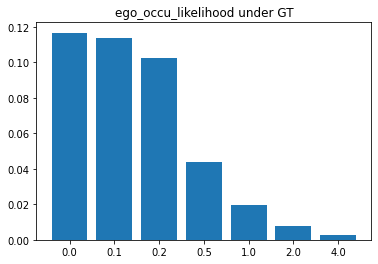

In [6]:
xlabel,yvalue = get_comparison(results,"ego_occu_likelihood_joint_likelihood",{"class":"GT"},"sigma")
xlabel,yvalue = np.array(xlabel), np.array(yvalue)
idx = np.argsort(xlabel)
xlabel,yvalue = xlabel[idx],yvalue[idx]
xlabel_str = [str(tick) for tick in xlabel]

plt.bar(xlabel_str,yvalue)
plt.title("ego_occu_likelihood under GT")
plt.savefig(os.path.join(figure_dir,"ego_occu_likelihood_sigma.png"))

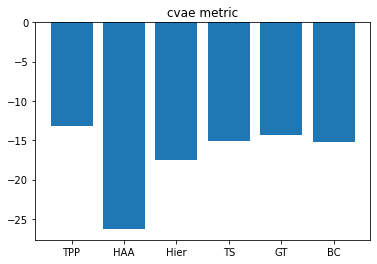

In [7]:
xlabel,yvalue = get_comparison(results,"ego_cvae_metrics_loglikelihood",{"sigma":0},"class")
plt.bar(xlabel,yvalue)
plt.title("cvae metric")
plt.savefig(os.path.join(figure_dir,"cvae_class.png"))

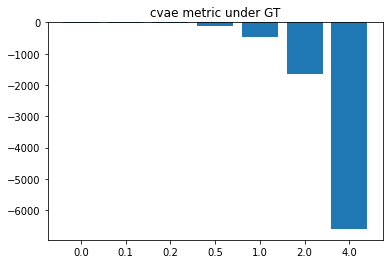

In [8]:
xlabel,yvalue = get_comparison(results,"ego_cvae_metrics_loglikelihood",{"class":"GT"},"sigma")
xlabel,yvalue = np.array(xlabel), np.array(yvalue)
idx = np.argsort(xlabel)
xlabel,yvalue = xlabel[idx],yvalue[idx]
xlabel_str = [str(tick) for tick in xlabel]

plt.bar(xlabel_str,yvalue)
plt.title("cvae metric under GT")
plt.savefig(os.path.join(figure_dir,"cvae_sigma.png"))

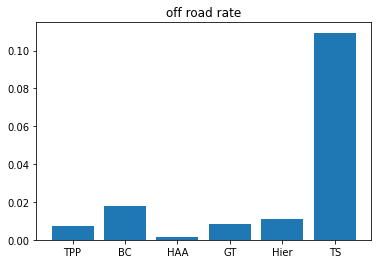

In [9]:
xlabel,yvalue = get_comparison(results,"all_off_road_rate_rate",{"sigma":0},"class")
plt.bar(xlabel,yvalue)
plt.title("off road rate")
plt.savefig(os.path.join(figure_dir,"offroad.png"))

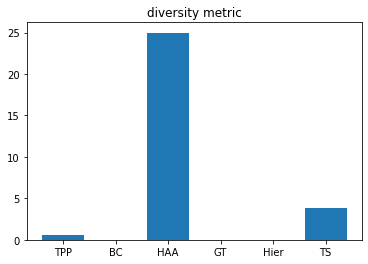

In [10]:
xlabel,yvalue = get_comparison(results,"ego_occupancy_diversity",{"sigma":0},"class")
plt.bar(xlabel,yvalue)
plt.title("diversity metric")
plt.savefig(os.path.join(figure_dir,"diversity.png"))

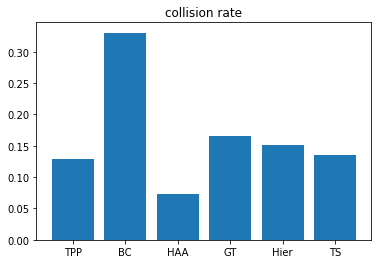

In [11]:
xlabel,yvalue = get_comparison(results,"all_collision_rate_coll_any",{"sigma":0},"class")
plt.bar(xlabel,yvalue)
plt.title("collision rate")
plt.savefig(os.path.join(figure_dir,"collision.png"))

In [12]:
metric_keys

['ego_ADE',
 'ego_FDE',
 'all_off_road_rate_rate',
 'all_off_road_rate_nframe',
 'all_collision_rate_CollisionType.FRONT',
 'all_collision_rate_CollisionType.REAR',
 'all_collision_rate_CollisionType.SIDE',
 'all_collision_rate_coll_any',
 'ego_occu_likelihood_indep_likelihood',
 'ego_occu_likelihood_joint_likelihood',
 'all_occupancy_coverage_total',
 'all_occupancy_coverage_onroad',
 'all_occupancy_coverage_success',
 'ego_occupancy_diversity',
 'ego_cvae_metrics_loglikelihood']